### Import Libreries

In [290]:
#main Libraries
import pandas as pd
from pandas import DataFrame
import os
import numpy as np
#visualisation libreries
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance 
from skmultilearn.problem_transform import ClassifierChain 
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

#Library for training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Working on the data

In [291]:
# import data with panda
data = pd.read_csv("pkt_radish.csv", engine='python', index_col = 0)
data.describe()

,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.0
mean,55.921318,10.441829,1.137189,14.971083,34.105582,2.383322,0.0
std,29.425040,10.093597,0.919365,11.637809,22.135068,9.748089,0.0
min,0.000000,-10.000000,0.000000,-6.000000,0.000000,0.000000,0.0
25%,49.000000,0.000000,1.000000,3.000000,20.000000,0.000000,0.0
50%,65.000000,9.000000,1.000000,16.000000,36.000000,0.000000,0.0
75%,76.000000,20.000000,2.000000,26.000000,49.000000,0.000000,0.0
max,100.000000,32.000000,5.000000,39.000000,98.000000,116.000000,0.0


## Data understanding throught visualisation

## Cleaning dataset

In [292]:
# making a copy of the dataset in what we will work 
data_c = data.copy()

In [293]:
#check if there sis null values in dataset
data_c.isnull().sum().sum()

1064

In [294]:
# reemoving all empty data 
data_c = data_c.dropna(how='any')

In [295]:
data_c

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId
idx,,,,,,,,,,,
1,2017-01-28,평택,56,0,1,7,16,0,0,무,PA130401
2,2017-01-16,평택,59,-4,1,2,23,0,0,무,PA130401
4,2017-01-11,평택,63,-3,1,1,31,0,0,무,PA130401
5,2017-01-03,평택,82,2,1,7,58,0,0,무,PA130401
6,2017-01-07,평택,78,4,1,10,52,0,0,무,PA130401
...,...,...,...,...,...,...,...,...,...,...,...
1483,2020-12-28,평택,75,5,0,11,36,0,0,무,PA130401
1484,2020-12-13,평택,73,0,2,3,41,1,0,무,PA130401
1485,2020-12-11,평택,76,6,1,10,46,0,0,무,PA130401


In [296]:
#checking if there still a null value in the dataset
data_c.isnull().sum()

date           0
area           0
dayAvgRhm      0
dayAvgTa       0
dayAvgWs       0
dayMaxTa       0
dayMinRhm      0
daySumRn       0
daySumSs       0
paCropName     0
paCropSpeId    0
dtype: int64

In [297]:
# checking data type 
for dtype in data.dtypes.iteritems(): 
    print(dtype)

('date', dtype('O'))
('area', dtype('O'))
('dayAvgRhm', dtype('int64'))
('dayAvgTa', dtype('int64'))
('dayAvgWs', dtype('int64'))
('dayMaxTa', dtype('int64'))
('dayMinRhm', dtype('int64'))
('daySumRn', dtype('int64'))
('daySumSs', dtype('int64'))
('paCropName', dtype('O'))
('paCropSpeId', dtype('O'))


## Feature Modelisation

In [298]:
data_c.columns

Index(['date', 'area', 'dayAvgRhm', 'dayAvgTa', 'dayAvgWs', 'dayMaxTa',
       'dayMinRhm', 'daySumRn', 'daySumSs', 'paCropName', 'paCropSpeId'],
      dtype='object')

In [299]:
data_c.shape

(1221, 11)

In [300]:
#transform string to day time 
data_c['date'] = pd.to_datetime(data_c['date'], errors = 'coerce')
data_c.date.head()

idx
1   2017-01-28
2   2017-01-16
4   2017-01-11
5   2017-01-03
6   2017-01-07
Name: date, dtype: datetime64[ns]

In [301]:
# creating separate columns for month and day because
data_c['month'] = data_c['date'].dt.month
data_c['day'] = data_c['date'].dt.day
data_c.head()

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId,month,day
idx,,,,,,,,,,,,,
1,2017-01-28,평택,56,0,1,7,16,0,0,무,PA130401,1,28
2,2017-01-16,평택,59,-4,1,2,23,0,0,무,PA130401,1,16
4,2017-01-11,평택,63,-3,1,1,31,0,0,무,PA130401,1,11
5,2017-01-03,평택,82,2,1,7,58,0,0,무,PA130401,1,3
6,2017-01-07,평택,78,4,1,10,52,0,0,무,PA130401,1,7


In [302]:
data_c.groupby('month').size()

month
1      95
2      99
3     111
4     102
5     110
6     103
7     108
8     104
9      91
10    104
11    101
12     93
dtype: int64

In [303]:
data_c.groupby('day').size()

day
1     42
2     43
3     43
4     43
5     42
6     42
7     43
8     42
9     43
10    39
11    40
12    39
13    44
14    39
15    37
16    41
17    41
18    41
19    43
20    40
21    44
22    36
23    39
24    38
25    38
26    39
27    38
28    38
29    36
30    28
31    20
dtype: int64

In [304]:
#Create another column that will contains the numiric values of area
data_c['area_id'] = data_c['area']

In [305]:
data_c.loc[data['area'] == '평택', 'area_id'] = 1   ##평택 == 1

In [306]:
#Create another column that will contains the numiric values of species
data_c['crop_id'] = data_c['paCropName']

In [307]:
data_c.loc[data['paCropName'] == '무', 'crop_id'] = 1   ##무 == 1

In [308]:
data_c.head()

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId,month,day,area_id,crop_id
idx,,,,,,,,,,,,,,,
1,2017-01-28,평택,56,0,1,7,16,0,0,무,PA130401,1,28,1,1
2,2017-01-16,평택,59,-4,1,2,23,0,0,무,PA130401,1,16,1,1
4,2017-01-11,평택,63,-3,1,1,31,0,0,무,PA130401,1,11,1,1
5,2017-01-03,평택,82,2,1,7,58,0,0,무,PA130401,1,3,1,1
6,2017-01-07,평택,78,4,1,10,52,0,0,무,PA130401,1,7,1,1


#### Creating a binary targets for classification

In [309]:
# For 무 we make the table true for certain contion
data_c['can_produce'] = (data_c.paCropName.isin(['무']) & (data_c.dayAvgTa < 21) & (data_c.dayAvgTa > 14))

In [310]:
#transform the table in binary
data_c['target_value'] = (data_c['can_produce']).astype('int')
data_c.head()

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId,month,day,area_id,crop_id,can_produce,target_value
idx,,,,,,,,,,,,,,,,,
1,2017-01-28,평택,56,0,1,7,16,0,0,무,PA130401,1,28,1,1,False,0
2,2017-01-16,평택,59,-4,1,2,23,0,0,무,PA130401,1,16,1,1,False,0
4,2017-01-11,평택,63,-3,1,1,31,0,0,무,PA130401,1,11,1,1,False,0
5,2017-01-03,평택,82,2,1,7,58,0,0,무,PA130401,1,3,1,1,False,0
6,2017-01-07,평택,78,4,1,10,52,0,0,무,PA130401,1,7,1,1,False,0


### Function to see prevalence

In [311]:
def calc_prevalence(y): 
    return (sum(y)/len(y))

In [312]:
calc_prevalence(data_c.target_value.values)

0.18427518427518427

### ploting for feature selection

## split samples : 70% train and 30% validation

In [313]:
# shuffle the samples
data_c = data_c.sample(n = len(data_c), random_state = 42)
data_c = data_c.reset_index(drop = True)
data_valid = data_c.sample(frac = 0.3, random_state = 42)
data_train = data_c.drop(data_valid.index)

In [314]:
#calcul Prevalence
print('Valid prevalence(n = %d):%.3f'%(len(data_valid),
calc_prevalence(data_valid.target_value.values)))
print('Train prevalence(n = %d):%.3f'%(len(data_train), 
calc_prevalence(data_train.target_value.values)))

Valid prevalence(n = 366):0.197
Train prevalence(n = 855):0.179


In [262]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 17 columns):
date            1221 non-null datetime64[ns]
area            1221 non-null object
dayAvgRhm       1221 non-null int64
dayAvgTa        1221 non-null int64
dayAvgWs        1221 non-null int64
dayMaxTa        1221 non-null int64
dayMinRhm       1221 non-null int64
daySumRn        1221 non-null int64
daySumSs        1221 non-null int64
paCropName      1221 non-null object
paCropSpeId     1221 non-null object
month           1221 non-null int64
day             1221 non-null int64
area_id         1221 non-null int64
crop_id         1221 non-null int64
can_produce     1221 non-null bool
target_value    1221 non-null int32
dtypes: bool(1), datetime64[ns](1), int32(1), int64(11), object(3)
memory usage: 149.2+ KB


In [374]:
# table of features
features2use = ['month', 'dayMaxTa', 'dayMinRhm']  

In [375]:
X_train = data_train[features2use].values
X_valid = data_valid[features2use].values

y_train = data_train['target_value'].values
y_valid = data_valid['target_value'].values

print('training shapes: ', X_train.shape, y_train.shape)
print('training shapes: ', X_valid.shape, y_valid.shape)

training shapes:  (855, 3) (855,)
training shapes:  (366, 3) (366,)


In [376]:
#Baseline Mean Error
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()] * len(y_train)

print('BaseLine MAE: ', round(mean_absolute_error(y_train, y_pred), 5))

BaseLine MAE:  0.29385


## Train the Model with random Forest

In [377]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Prediction 

In [378]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_valid)[:,1]

#### Performance evalution 

In [379]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
 # calculates specificity
 return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):  
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [380]:
thresh = 0.201
print('random Forest')
print('trining')
print_report(y_train, y_train_preds, thresh);
print('validation: ')
print_report(y_valid, y_valid_preds, thresh);

random Forest
trining
AUC:0.990
accuracy:0.888
recall:1.000
precision:0.614
specificity:0.863
prevalence:0.179
 
validation: 
AUC:0.972
accuracy:0.883
recall:1.000
precision:0.626
specificity:0.854
prevalence:0.197
 


### Ploting 

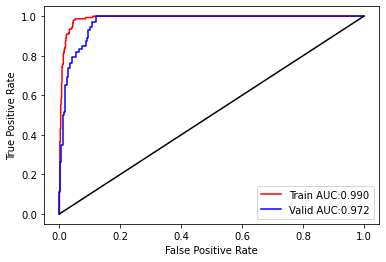

In [381]:
### ROC curve 
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1], 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### investigating features for better usage

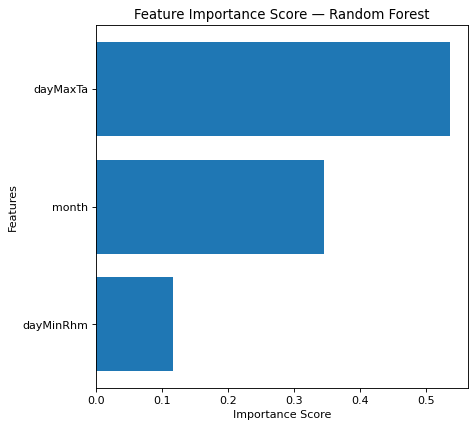

In [382]:
feature_importances = pd.DataFrame(rf.feature_importances_,
 index = features2use,
 columns=['importance']).sort_values('importance',ascending=False)

num = min([50,len(features2use)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score — Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

## Train the Model with Logistic regression 

In [383]:
#fit a logistic regression in on the training dataset 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression(solver='lbfgs')
#fit
model.fit(X_train, y_train)

#make predictions

yhat = model.predict(X_train)

#evaluatin 

acc = accuracy_score(y_train, yhat)
print(acc)

0.8198830409356725


In [384]:
data_c

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId,month,day,area_id,crop_id,can_produce,target_value
0,2018-09-04,평택,78,23,2,27,55,0,0,무,PA130401,9,4,1,1,False,0
1,2017-11-06,평택,74,8,1,16,44,0,0,무,PA130401,11,6,1,1,False,0
2,2017-02-15,평택,64,1,1,9,30,0,0,무,PA130401,2,15,1,1,False,0
3,2020-04-27,평택,51,11,2,18,20,0,0,무,PA130401,4,27,1,1,False,0
4,2019-07-18,평택,72,26,1,31,49,0,0,무,PA130401,7,18,1,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,2020-05-11,평택,69,17,0,23,30,1,0,무,PA130401,5,11,1,1,True,1
1217,2020-08-20,평택,81,27,1,33,53,0,0,무,PA130401,8,20,1,1,False,0
1218,2020-09-26,평택,64,19,1,25,45,0,0,무,PA130401,9,26,1,1,True,1
1219,2019-11-14,평택,42,2,2,5,26,0,0,무,PA130401,11,14,1,1,False,0


### Try to create random input to see if the model works 

In [385]:
model = LogisticRegression(solver='lbfgs')
#fit
model.fit(X_train, y_train)
#make predictions
yhat = model.predict(X_train)
#evaluatin 
acc = accuracy_score(y_train, yhat)
#input
new_input = [[23]]   ### ['month', 'dayMaxTa', 'dayMinRhm'] 
new_output = model.predict(new_input)

print(new_input, new_output)

ValueError: X has 1 features per sample; expecting 3

In [373]:
model.score(X_train, y_train)

0.8210526315789474